# Project 1 Titanic Dataset

Objective - Develop a model to predict whether the passenger survived or not on provided details.

Target variable is Survived and since there are 'only two' types of categorical variables (survived or Not Survived) needs to be predicted hence logisctics regression(Classification) is more suitable approach is more suitable

# Importing Libarires

In [113]:
#importing required libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [114]:
#loading/importing dataset
tnt = pd.read_csv('titanic_train.csv')

# Data Prepration

In [115]:
tnt.head() # Check preview of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
tnt.info() # to check datatype & Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1. All data types are not numerical i.e Name,Sex, Ticket, Cabin & Embarked - Which require to encode data.
2. Age, Cabin has null values present with 2 null values in Embarked

In [117]:
tnt.shape

(891, 12)

In [118]:
tnt.isnull().sum() # To check No of null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin & Age has significant Nan values, which can be dropped.

In [119]:
tnt.drop(['Cabin'],axis =1, inplace = True) # droped due to high Nan Values
tnt.drop(['Age'],axis =1, inplace = True) # droped due to high Nan Values
tnt.drop(['PassengerId'],axis =1, inplace = True) # droped for being highly unique
tnt.drop(['Name'],axis =1, inplace = True) # droped for being highly unique

In [120]:
tnt.keys()

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [121]:
tnt.shape

(891, 8)

In [122]:
tnt.dropna()

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,1,0,A/5 21171,7.2500,S
1,1,1,female,1,0,PC 17599,71.2833,C
2,1,3,female,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,1,0,113803,53.1000,S
4,0,3,male,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,211536,13.0000,S
887,1,1,female,0,0,112053,30.0000,S
888,0,3,female,1,2,W./C. 6607,23.4500,S
889,1,1,male,0,0,111369,30.0000,C


In [123]:
tnt.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

All Nan values are removed

In [124]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
list = ['Sex','Ticket','Embarked']
for val in list:
    tnt[val] = le.fit_transform(tnt[val].astype('str'))

In [125]:
tnt.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,1,0,523,7.2500,2
1,1,1,0,1,0,596,71.2833,0
2,1,3,0,0,0,669,7.9250,2
3,1,1,0,1,0,49,53.1000,2
4,0,3,1,0,0,472,8.0500,2
5,0,3,1,0,0,275,8.4583,1
6,0,1,1,0,0,85,51.8625,2
7,0,3,1,3,1,395,21.0750,2
8,1,3,0,0,2,344,11.1333,2
9,1,2,0,1,0,132,30.0708,0


In [126]:
tnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Ticket    891 non-null    int32  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(1), int32(3), int64(4)
memory usage: 45.4 KB


All values are converted to Numeric values

# EDA Process

Univeriate Analysis

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

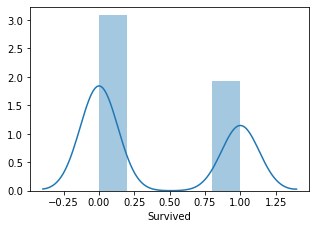

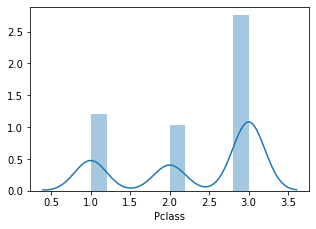

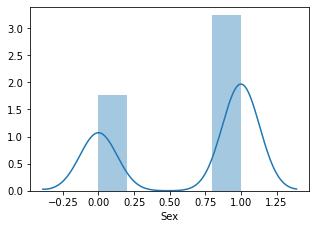

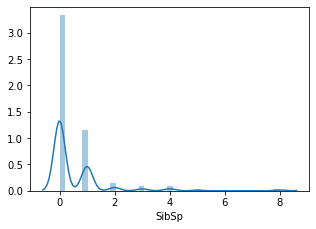

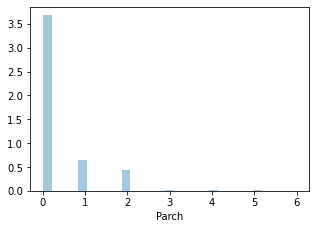

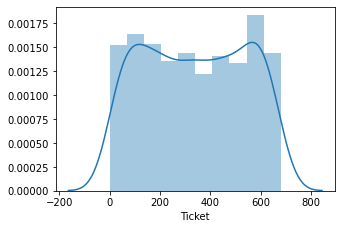

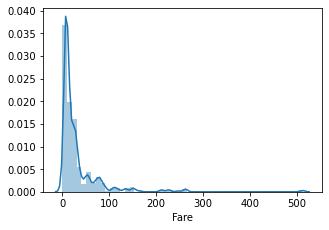

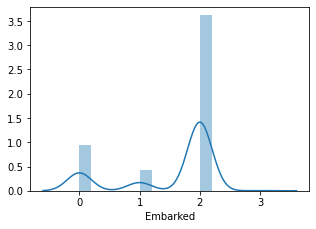

In [128]:
collist = tnt.columns.values # To check distribution plot
for i in range(0,len(collist)):
    plt.figure(figsize = (5,40))
    plt.subplot(10,1,i+1)
    sns.distplot(tnt[collist[i]])
    plt.show()

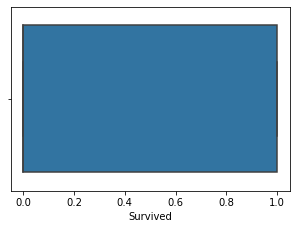

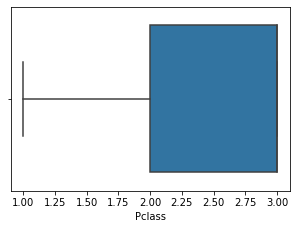

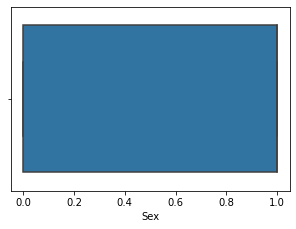

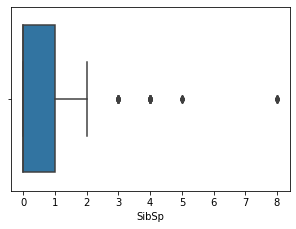

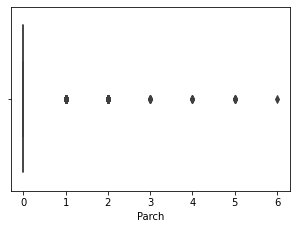

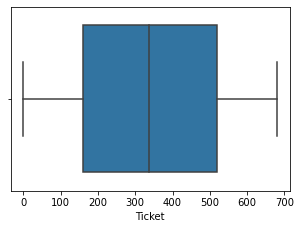

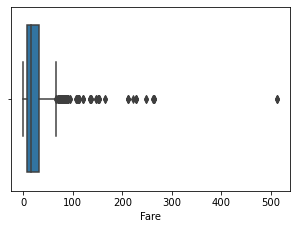

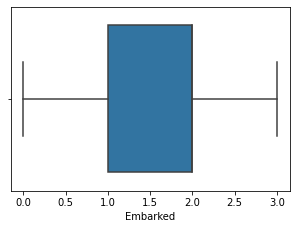

In [129]:
collist = tnt.columns.values
for i in range(0,len(collist)):
    plt.figure(figsize = (5,40))
    plt.subplot(10,1,i+1)
    sns.boxplot(tnt[collist[i]])
    plt.show()

In [130]:
# Sibsp,Parch, Fare, shows presence of outliers

In [131]:
tnt_cor = tnt.corr()

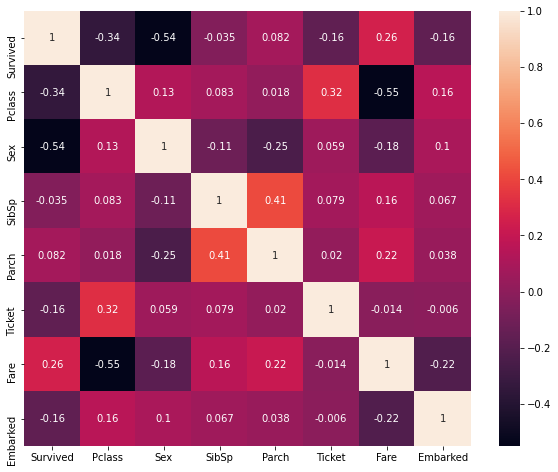

In [132]:
plt.figure(figsize = (10,8))
sns.heatmap(tnt_cor, annot = True)
plt.show()

In [133]:
# Removing outliers using Z score
import scipy
from scipy.stats import zscore
z = np.abs(zscore(tnt))
threshold = 3
new_tnt = tnt[(z<3).all(axis=1)]

In [134]:
new_tnt.shape

(827, 8)

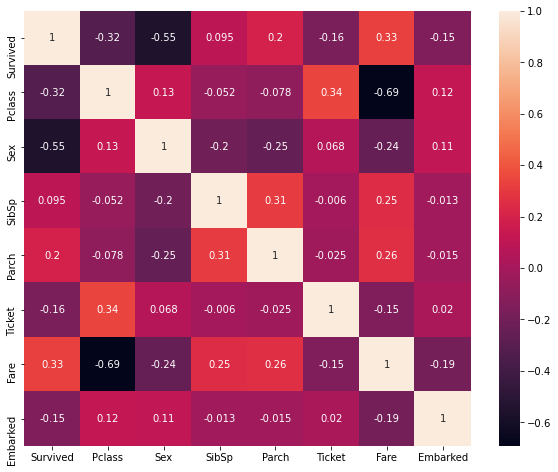

In [135]:
new_tnt_cor = new_tnt.corr()
plt.figure(figsize = (10,8))
sns.heatmap(new_tnt_cor, annot = True)
plt.show()

In [136]:
# Removing outliers has increased positive correlation

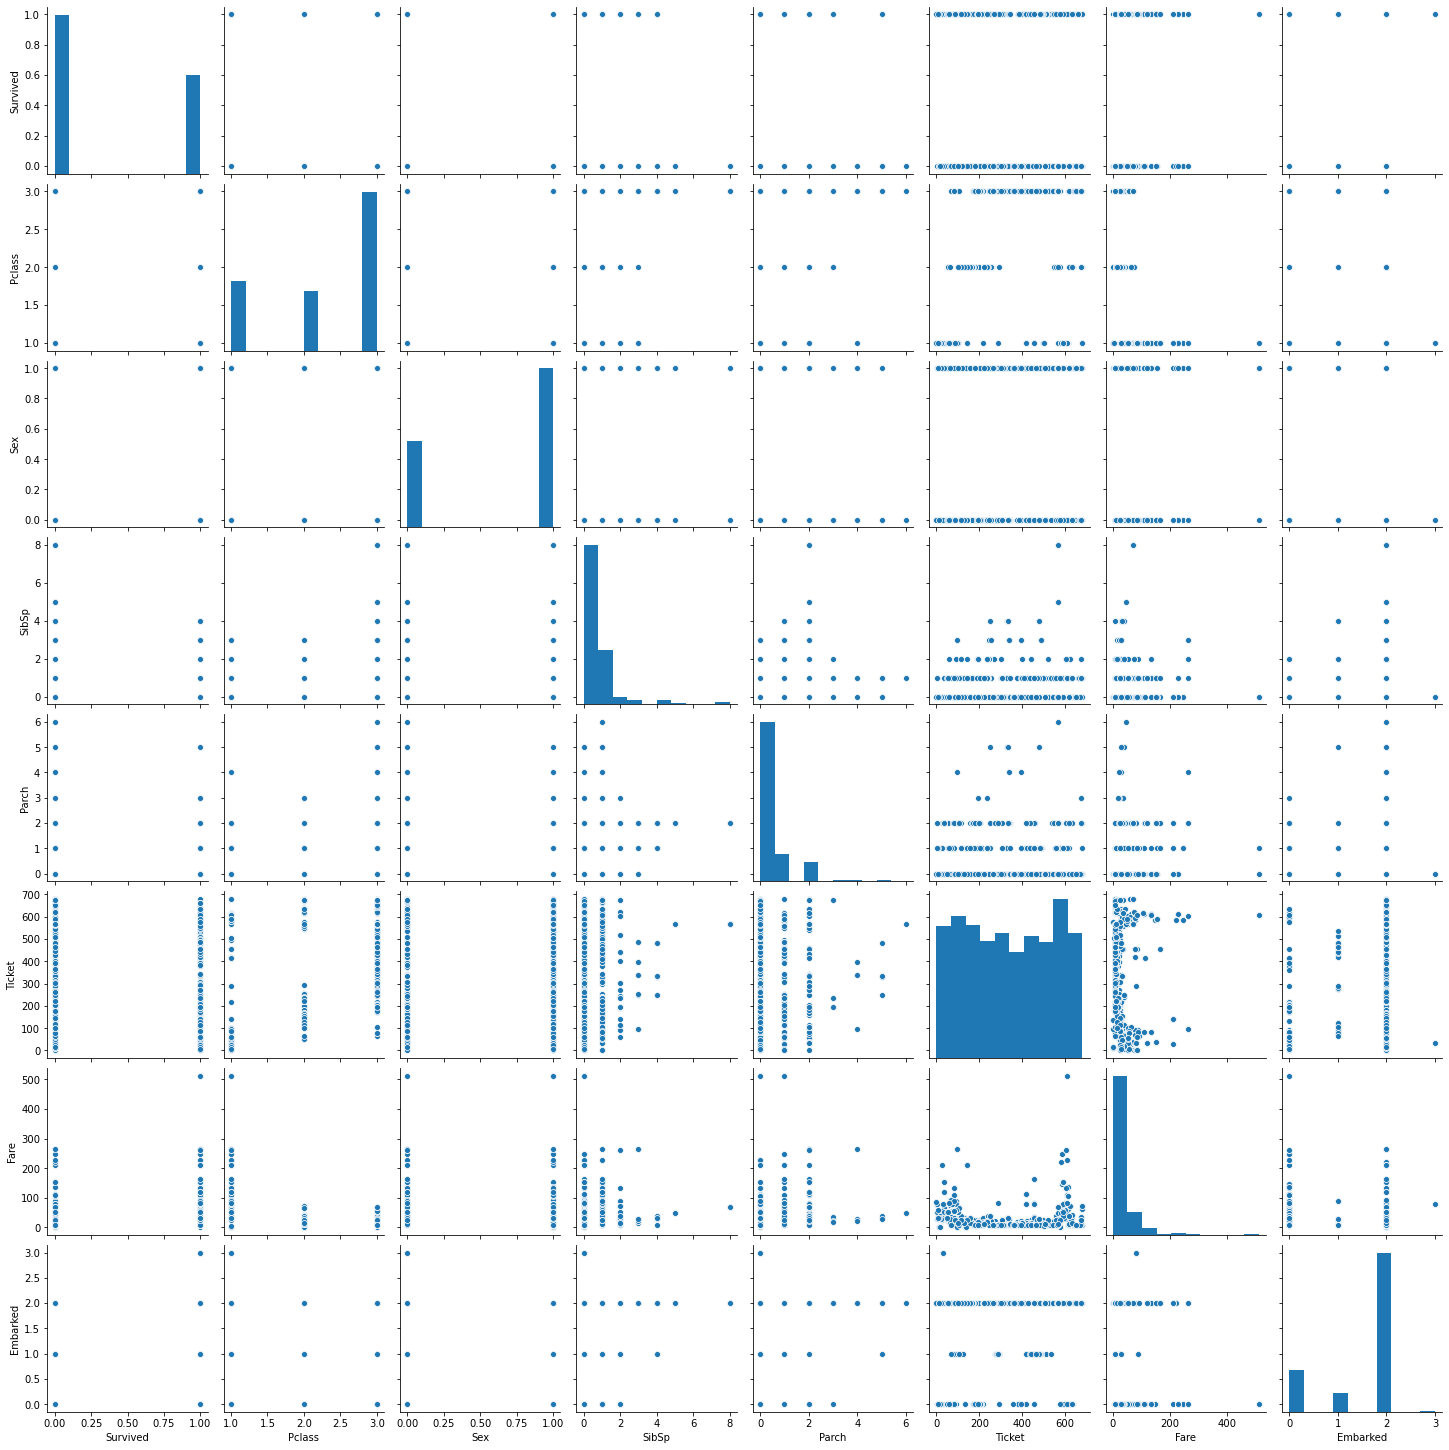

In [137]:
sns.pairplot(tnt)

In [160]:
# Graphs do not indicate towards any good coorelation

# Building Model and checking performance with various algorithms

In [138]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB

In [139]:
x = tnt.iloc[:,1:-1]
y = tnt.iloc[:,0]

In [140]:
x_1 = new_tnt.iloc[:,1:-1] # Data after removing outliers
y_1 = new_tnt.iloc[:,0]

In [141]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31, random_state = 36) # on checking best accuracy score is acheived at random state 36
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
cvscore = cross_val_score(LogisticRegression(),x_train,y_train,cv=5).mean()
sc = accuracy_score(y_test,pred)
print(f'accuracy score is {sc} and cross validation score is {cvscore}')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is 0.8411552346570397 and cross validation score is 0.7768226042916166
[[151  17]
 [ 27  82]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       168
           1       0.83      0.75      0.79       109

    accuracy                           0.84       277
   macro avg       0.84      0.83      0.83       277
weighted avg       0.84      0.84      0.84       277



In [142]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x_1,y_1,test_size = .31, random_state = 36)
lr1 = LogisticRegression()
lr1.fit(x1_train,y1_train)
pred = lr1.predict(x1_test)
cvscore = cross_val_score(LogisticRegression(),x1_train,y1_train,cv=5).mean()
sc = accuracy_score(y1_test,pred)
print(f'accuracy score is {sc} and cross validation score is {cvscore}')
print(confusion_matrix(y1_test,pred))
print(classification_report(y1_test,pred))

accuracy score is 0.77431906614786 and cross validation score is 0.7982456140350878
[[128  20]
 [ 38  71]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.82       148
           1       0.78      0.65      0.71       109

    accuracy                           0.77       257
   macro avg       0.78      0.76      0.76       257
weighted avg       0.77      0.77      0.77       257



In [143]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
pred = mnb.predict(x_test)
sc = accuracy_score(y_test,pred)
print(f'accuracy score is {sc}')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is 0.6931407942238267
[[136  32]
 [ 53  56]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       168
           1       0.64      0.51      0.57       109

    accuracy                           0.69       277
   macro avg       0.68      0.66      0.67       277
weighted avg       0.69      0.69      0.69       277



In [144]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x_1,y_1,test_size = .31, random_state = 36)
mnb1 = MultinomialNB()
mnb1.fit(x1_train,y1_train)
pred = mnb1.predict(x1_test)
sc = accuracy_score(y1_test,pred)
print(f'accuracy score is {sc}')
print(confusion_matrix(y1_test,pred))
print(classification_report(y1_test,pred))

accuracy score is 0.7354085603112841
[[120  28]
 [ 40  69]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       148
           1       0.71      0.63      0.67       109

    accuracy                           0.74       257
   macro avg       0.73      0.72      0.72       257
weighted avg       0.73      0.74      0.73       257



In [145]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [146]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rfpred = rf.predict(x_test)
print(accuracy_score(y_test,rfpred))

0.7942238267148014


In [147]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
adpred = ad.predict(x_test)
print(accuracy_score(y_test,adpred))

0.8339350180505415


In [148]:
rf1 = RandomForestClassifier()
rf1.fit(x1_train,y1_train)
rfpred = rf1.predict(x1_test)
print(accuracy_score(y1_test,rfpred))

0.754863813229572


In [149]:
ad1 = AdaBoostClassifier()
ad1.fit(x1_train,y1_train)
adpred = ad1.predict(x1_test)
print(accuracy_score(y1_test,adpred))

0.77431906614786


# Ploting AUC-ROC curve for the selected model

In [150]:
from sklearn.metrics import roc_curve,roc_auc_score

0.8684469200524246


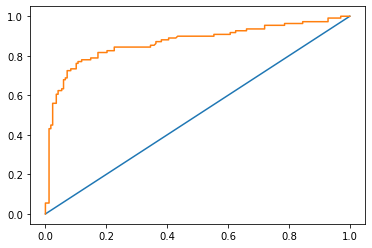

In [151]:
y_pred_prob = lr.predict_proba(x_test)[0:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
auc_score = roc_auc_score(y_test,y_pred_prob)
print(auc_score)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label = 'Logistics Regression')
plt.show() 

0.8687745740498035


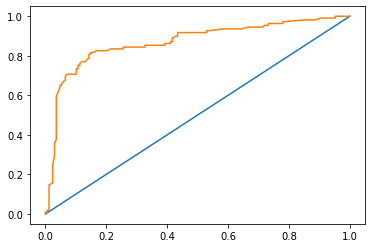

In [152]:
y_pred_prob = ad.predict_proba(x_test)[0:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
auc_score = roc_auc_score(y_test,y_pred_prob)
print(auc_score)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label = 'AdaBoost')
plt.show()

# Conclusion - Though predict probability is almost same for both AdaBoost & Logistic Regression, accuracy is higher for Logistic Regression

# Serialization

In [153]:
import joblib

In [154]:
joblib.dump(lr,'Project_1_Titanic_dataset.pkl')

['Project_1_Titanic_dataset.pkl']

In [155]:
sk =joblib.load('Project_1_Titanic_dataset.pkl')